# Objective : Email-Spam-Ham-Classifier-NLP

# Exploratory Data Analysis (EDA) - Python

# Insights - Patterns

# Classification (Using the ML)

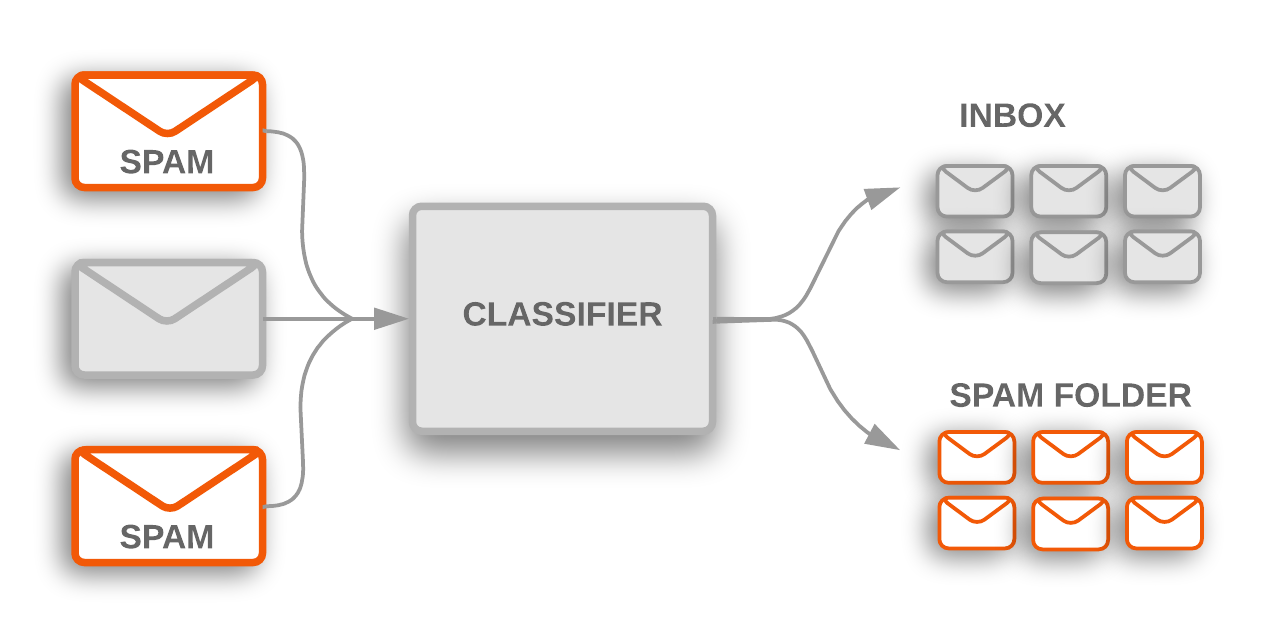

# 1. Load Python Modules

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 2. Read the Dataset from CSV file  - Using Pandas

In [27]:
file_path=r"spam.csv"
email_df = pd.read_csv(file_path)
email_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 3. Basic Inspection on given dataset

In [28]:
def basic_inspection_text_dataset(table):
    print("Top 5 Records of dataset")
    print(table.head())
    print()
        
    print("Bottom Records of dataset")
    print(table.tail())
    print()
    
    print("Column/features/Variable  - Names of Given dataset")
    print(table.columns)
    print()
    
    print("Shape(rows x columns) - of Given dataset")
    print(table.shape)
    print()
    
    print("Data types - Given Column Names")
    print(table.dtypes)
    print()
    
    print("Summry of dataset")
    print(table.info())
    print()
    
    print("To see the count of null/nan values in columns of dataset")
    print(table.isnull().value_counts())
    print()
    
    print("Dataset Summary ")
    print(table.describe())
    print()
    
basic_inspection_text_dataset(email_df)

Top 5 Records of dataset
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

Bottom Records of dataset
     Category                                            Message
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

Column/features/Variable  - Names of Given dataset
Index(['Category', 'Message'], dtype='object')

Shape(rows x columns) - of Given dataset
(5572, 2)

Data types - Given Column Names
Ca

# 4. Dataset - Understanding

In [29]:
email_df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [30]:
email_df['spam'] = email_df['Category'].apply(lambda x: 1 if x =='spam' else 0)

In [31]:
email_df.shape

(5572, 3)

In [32]:
email_df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


# 5. Create bag of words representation using CountVectorizer

In [33]:
v = CountVectorizer()
X_Message_cv = v.fit_transform(email_df["Message"])

# 6. Train test split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_Message_cv, email_df['spam'] , test_size=0.2,random_state=42)

In [35]:
X_train.shape

(4457, 8709)

In [36]:
X_test.shape

(1115, 8709)

In [37]:
type(X_train)

scipy.sparse._csr.csr_matrix

In [38]:
type(y_train)

pandas.core.series.Series

In [39]:
y_train[:4]

1978    1
3989    0
3935    0
4078    0
Name: spam, dtype: int64

In [40]:
v.get_feature_names_out()

array(['00', '000', '000pes', ..., 'èn', 'ú1', '〨ud'], dtype=object)

In [41]:
v.vocabulary_

{'go': 3567,
 'until': 8080,
 'jurong': 4370,
 'point': 5954,
 'crazy': 2334,
 'available': 1313,
 'only': 5567,
 'in': 4110,
 'bugis': 1763,
 'great': 3651,
 'world': 8544,
 'la': 4497,
 'buffet': 1761,
 'cine': 2057,
 'there': 7690,
 'got': 3611,
 'amore': 1079,
 'wat': 8320,
 'ok': 5534,
 'lar': 4533,
 'joking': 4338,
 'wif': 8446,
 'oni': 5563,
 'free': 3369,
 'entry': 2959,
 'wkly': 8502,
 'comp': 2174,
 'to': 7802,
 'win': 8459,
 'fa': 3096,
 'cup': 2394,
 'final': 3217,
 'tkts': 7789,
 '21st': 410,
 'may': 4955,
 '2005': 401,
 'text': 7640,
 '87121': 791,
 'receive': 6336,
 'question': 6228,
 'std': 7275,
 'txt': 7982,
 'rate': 6280,
 'apply': 1166,
 '08452810075over18': 77,
 'dun': 2811,
 'say': 6675,
 'so': 7070,
 'early': 2832,
 'hor': 3948,
 'already': 1051,
 'then': 7684,
 'nah': 5266,
 'don': 2720,
 'think': 7705,
 'he': 3801,
 'goes': 3575,
 'usf': 8126,
 'lives': 4688,
 'around': 1217,
 'here': 3852,
 'though': 7725,
 'freemsg': 3376,
 'hey': 3862,
 'darling': 2451,
 'it

In [42]:
X_train_np = X_train.toarray()
X_train_np[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
np.where(X_train_np[0]!=0)

(array([ 296,  402,  795, 1447, 2394, 2922, 3195, 3830, 6438, 6767, 6790,
        7311, 7670, 7802, 8371, 8419, 8456, 8459, 8544], dtype=int64),)

## 7. Train the naive bayes model

In [44]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

## 8. Evaluate Performance

In [45]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.94      0.95      0.95       149

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



# 9. Test Samples

In [46]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

# 10. Logistic Regression 

In [47]:
def draw_heatmap(conf_matrix):
    sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()

Model - Logistic Regression
accuracy train score overall : 0.99798070450976
accuracy test score overall : 0.9856502242152466
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.90      0.94       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115

[[965   1]
 [ 15 134]]


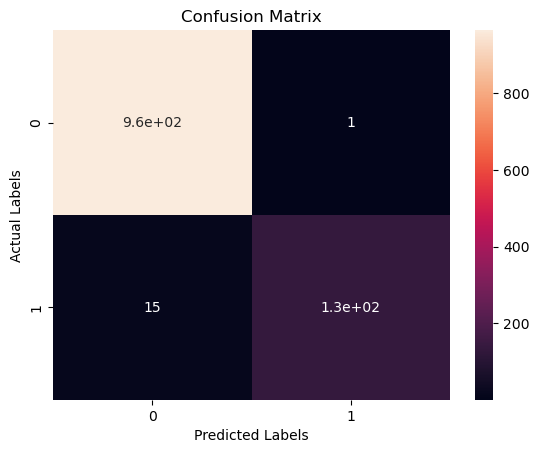

In [51]:
lg_model = LogisticRegression(solver='lbfgs', max_iter=500, random_state=42)
lg_model.fit(X_train, y_train)

print("Model - Logistic Regression")
score = lg_model.score(X_train, y_train)
print('accuracy train score overall :', score)
score = lg_model.score(X_test, y_test)
print('accuracy test score overall :', score)

y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
draw_heatmap(conf_matrix)

In [52]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

emails_count = v.transform(emails)
lg_model.predict(emails_count)

array([0, 0], dtype=int64)